In [1]:
# standardization : it is scaling technique in which we make the data in certain range (formula : X-x^bar)//sigma(when you want the centric mean data then go for std)
#first we calculate the mean and standard deviation and transform the data points 
#normalization : it is scaling technique in which we scaled the data in range(0,1). it is used when  we know the range prior (most
# probably used in image processing task )


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
dfs=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv")

In [5]:
dfs.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dfs=dfs.drop('User ID',axis=1)

In [7]:
dfs.nunique()

Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [8]:
dfs.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
dfs.duplicated().sum()

20

In [10]:
dfs["Purchased"].duplicated().sum()

398

In [11]:
dfs.shape

(400, 4)

In [12]:
df=dfs.iloc[:,1:]

In [ ]:
#split the dataset

In [13]:
X_train,x_test,y_train,y_test=train_test_split(df.drop(['Purchased'],axis=1),
                                               df['Purchased'],test_size=0.25,random_state=0)

In [14]:
X_train.shape

(300, 2)

In [15]:
y_train.shape

(300,)

In [16]:
x_test.shape

(100, 2)

In [17]:
y_test.shape

(100,)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
Std=StandardScaler()

In [20]:
Std.fit(X_train) # scaled the features only

StandardScaler()

In [21]:
scaled_data=Std.transform(X_train)
scaled_test_data=Std.transform(x_test)

In [30]:
X_train.head()

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000


In [23]:
y_train

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64

In [24]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


In [25]:
Std.mean_[0]

38.126666666666665

In [26]:
type(scaled_test_data)
# type(scaled_data)

numpy.ndarray

In [32]:
X_train_scaled.head()

,Age,EstimatedSalary
0,0.581649,-0.886707
1,-0.606738,1.461738
2,-0.012544,-0.567782
3,-0.606738,1.896635
4,1.373907,-1.408584


In [27]:
X_train_scaled = pd.DataFrame(scaled_data, columns=['Age','EstimatedSalary'])
X_test_scaled = pd.DataFrame(scaled_test_data, columns=['Age','EstimatedSalary'])

In [31]:
X_test_scaled.head()

,Age,EstimatedSalary
0,-0.804802,0.504964
1,-0.012544,-0.567782
2,-0.309641,0.157046
3,-0.804802,0.273019
4,-0.309641,-0.567782


In [37]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,38.1,69583.3
std,10.1,34548.5
min,18.0,15000.0
25%,30.8,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [36]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.7,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.2,2.3


In [38]:
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,100.0,100.0
mean,-0.2,0.0
std,1.1,1.0
min,-2.0,-1.6
25%,-1.1,-0.7
50%,-0.3,0.1
75%,0.5,0.5
max,2.2,2.3


In [39]:
np.round(x_test.describe(),1)

,Age,EstimatedSalary
count,100.0,100.0
mean,36.2,70220.0
std,11.5,32869.7
min,18.0,15000.0
25%,27.0,47000.0
50%,35.0,72500.0
75%,43.5,87000.0
max,60.0,150000.0


Text(0.5, 1.0, 'after scaling')

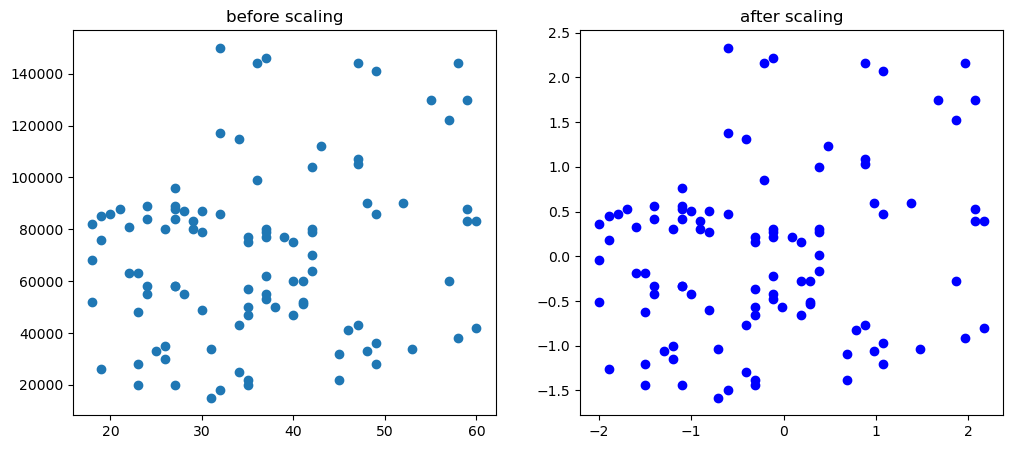

In [46]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5)) # by doing scaling we got the zero center data
ax1.scatter(x_test['Age'],x_test['EstimatedSalary'])
ax1.set_title("before scaling")
ax2.scatter(X_test_scaled["Age"],X_test_scaled["EstimatedSalary"],color='blue')
ax2.set_title("after scaling")

Text(0.5, 1.0, 'after scaling')

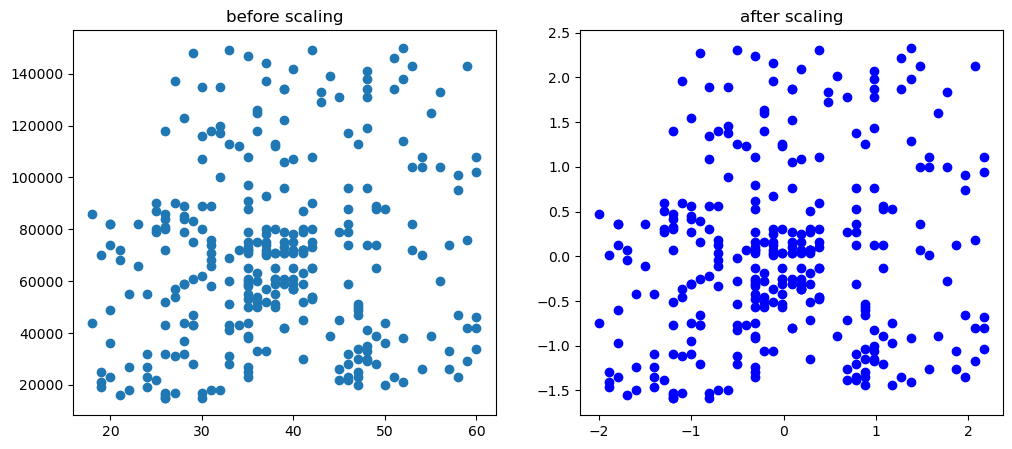

In [45]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5)) # by doing scaling we got the zero center data
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color='blue')
ax2.set_title("after scaling")

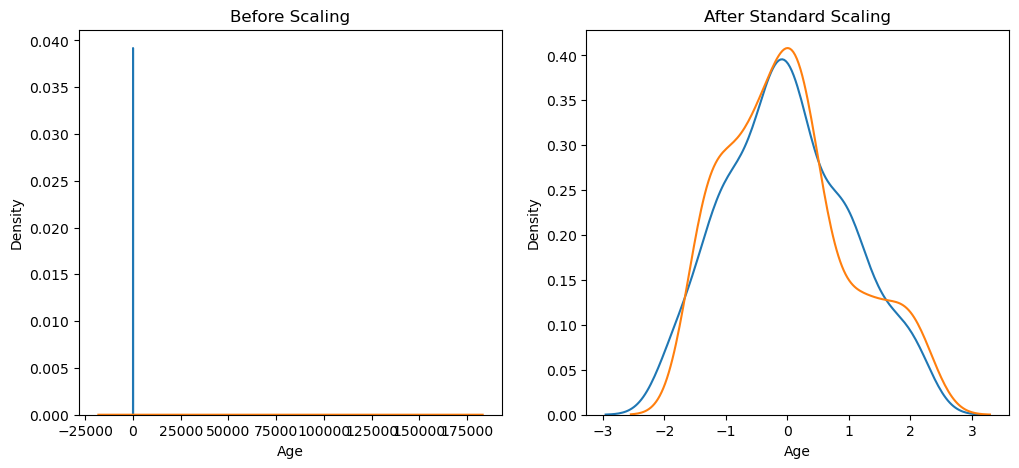

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [48]:
# comparison of distribution

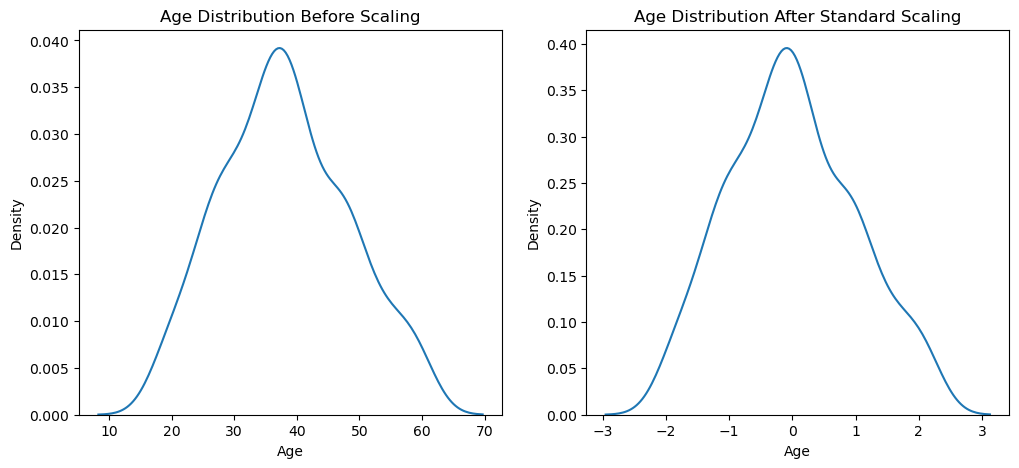

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# we will get the zero skew data
# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

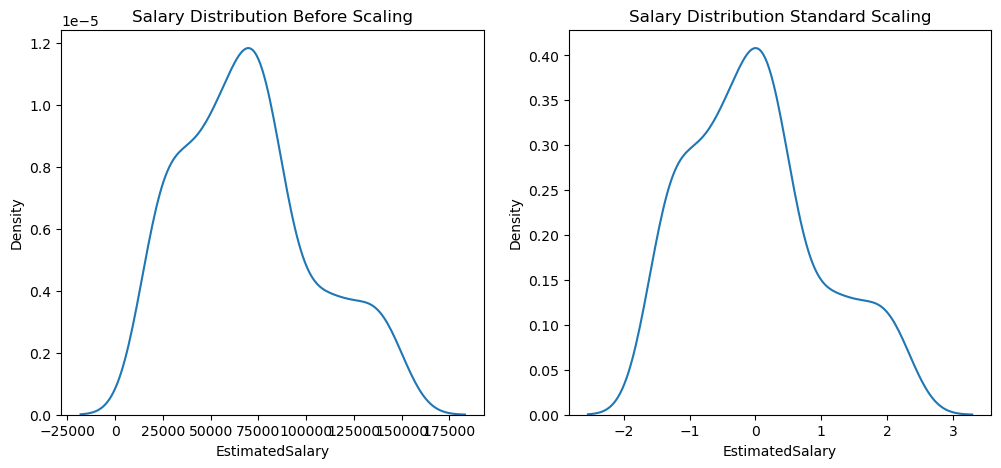

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR=LogisticRegression()

In [56]:
LR.fit(X_train_scaled,y_train)

LogisticRegression()

In [58]:
ypred=LR.predict(X_test_scaled)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(ypred,y_test) 

0.89

In [64]:
0.89   # this accuracy is on scaled data 

0.89

In [65]:
LR1=LogisticRegression()

In [68]:
LR1.fit(X_train,y_train)

LogisticRegression()

In [70]:
y_ped1=LR1.predict(x_test)

In [73]:
accuracy_score(y_ped1,y_test)  

0.68

In [ ]:
0.68 #this is accuarcy before scaling the data 

In [74]:
import pickle

In [80]:
pickle.dump(LR,open("social.network.pkl",'wb'))

In [84]:
load_model=pickle.load(open('social.network.pkl','rb')) # now i have loaded the model 

In [88]:
load_model.score(X_test_scaled,y_test)

0.39

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
DT=DecisionTreeClassifier()

In [92]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
yped2=DT.predict(x_test)

In [96]:
accuracy_score(yped2,y_test)*100

90.0

In [97]:
DT1=DecisionTreeClassifier()

In [99]:
DT1.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [101]:
ypred3=DT1.predict(X_test_scaled)

In [104]:
accuracy_score(ypred3,y_test)*100 # there is no need to scaled the feature in decision tree 

90.0

In [108]:
# effect of outliers in the data 

In [109]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\rajpu\AppData\Local\Temp\ipykernel_9192\2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


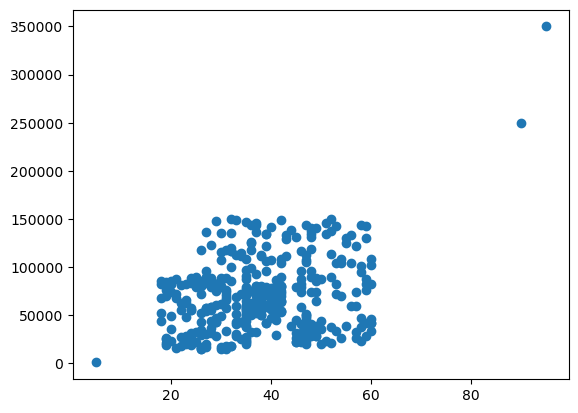

In [112]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [115]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                              df['Purchased'],
                                              test_size=0.3,
                                              random_state=0)
X_train.shape,x_test.shape

((282, 2), (121, 2))

In [117]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(X_train)
x_train_scaled=std.transform(X_train)
x_test_scaled=std.transform(x_test)

In [120]:
X_train_scaled=pd.DataFrame(x_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

Text(0.5, 1.0, 'after scaling')

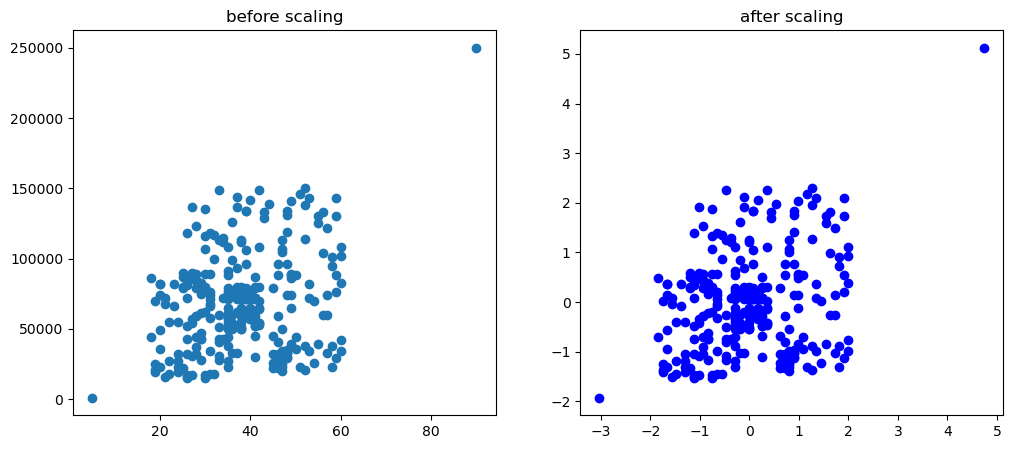

In [121]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5)) # by doing scaling we got the zero center data
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color='blue')
ax2.set_title("after scaling")

#  Normalization

In [137]:
df1=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv",header=None,usecols=[0,1,2],names=['class','alcohol','malic acid'])

In [138]:
df1.head()

,class,alcohol,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='alcohol', ylabel='Density'>

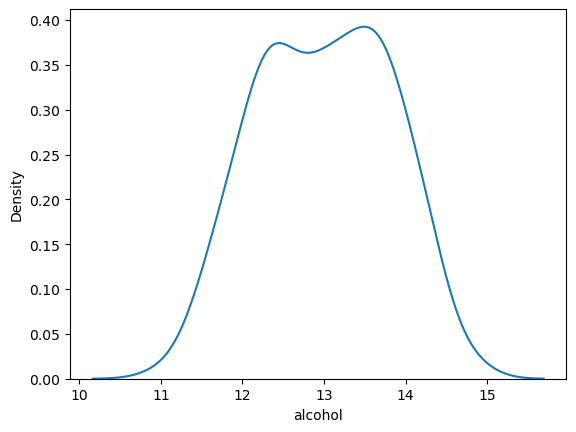

In [140]:
sns.kdeplot(df1["alcohol"])

<Axes: xlabel='malic acid', ylabel='Density'>

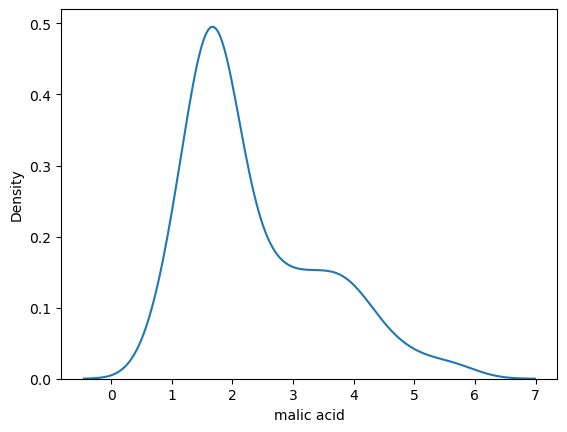

In [142]:
sns.kdeplot(df1["malic acid"]) # this is right skeweed data 

<Axes: xlabel='alcohol', ylabel='malic acid'>

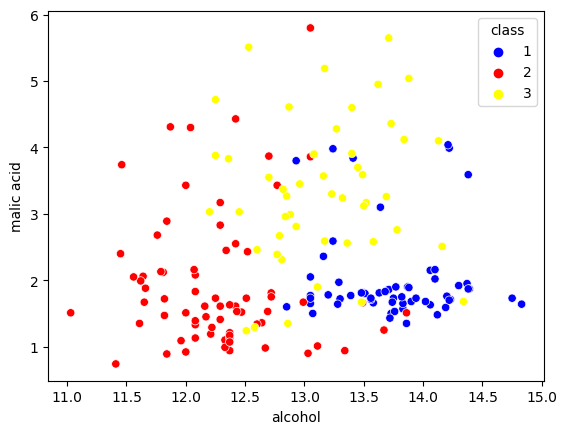

In [146]:
color_dict={1:'blue',2:"red",3:"yellow"}
sns.scatterplot(x=df1['alcohol'],y=df1["malic acid"],hue=df1["class"],palette=color_dict)

In [148]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(df1.drop('class',axis=1),
                                              df1['class'],
                                              test_size=0.30,random_state=0)

In [150]:
from sklearn.preprocessing import MinMaxScaler 

In [151]:
scaled=MinMaxScaler()

In [152]:
scaled.fit(X_train)

MinMaxScaler()

In [154]:
X_train_scaled=scaled.transform(X_train)

In [155]:
X_test_scaled=scaled.transform(x_test)

In [160]:
scaled_data_train=pd.DataFrame(X_train_scaled,columns=X_train.columns)
scaled_data_test=pd.DataFrame(X_test_scaled,columns=x_test.columns)

In [162]:
np.round(scaled_data_train.describe(),1)

,alcohol,malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


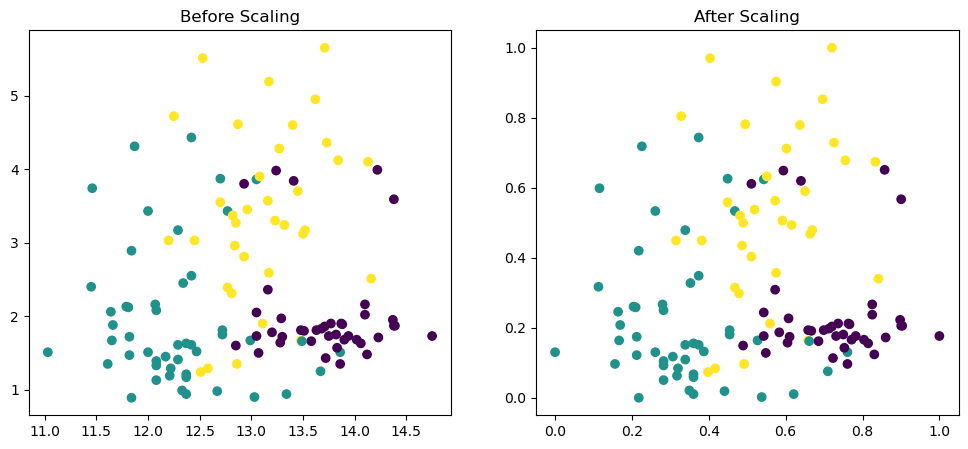

In [166]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['alcohol'],X_train['malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(scaled_data_train['alcohol'], scaled_data_train['malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

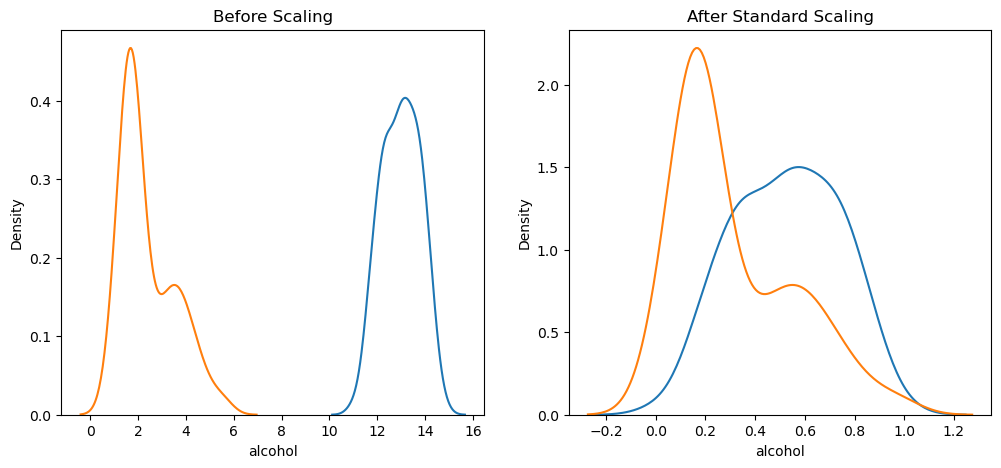

In [167]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)
sns.kdeplot(X_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(scaled_data_train['alcohol'], ax=ax2)
sns.kdeplot(scaled_data_train['malic acid'], ax=ax2)
plt.show()

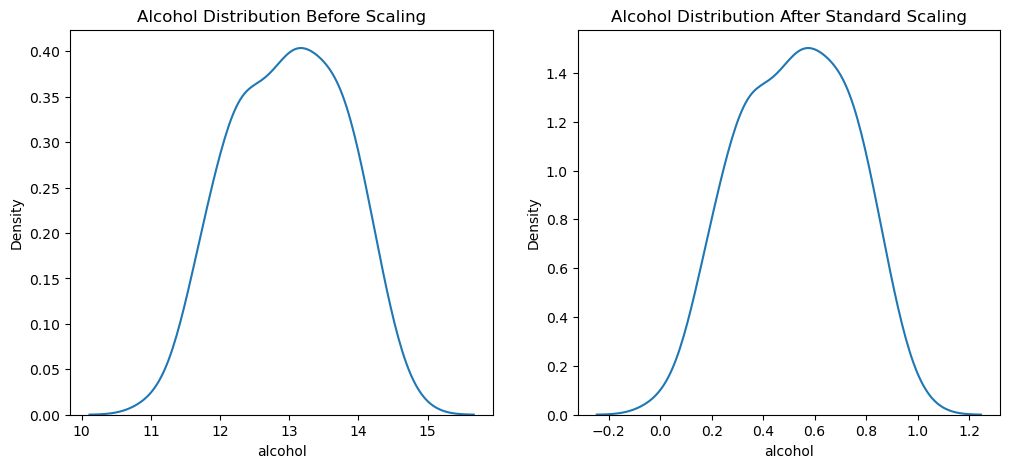

In [168]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(scaled_data_train['alcohol'], ax=ax2)
plt.show()

In [170]:
# there is no chnages it is looking similar after applying scaling on top of the data 

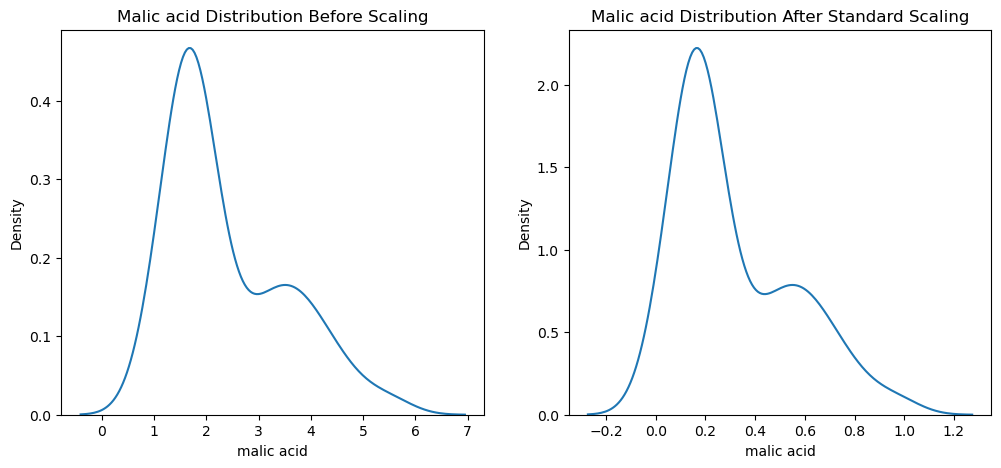

In [169]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(scaled_data_train['malic acid'], ax=ax2)
plt.show()